In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [78]:
df=pd.read_csv('Cleaned_Diabetes.csv',index_col=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_BloodPressure,Weight,Elderly,Glucose_Level,Thickness_level
0,6,148,72,35,125.0,33.6,0.627,50,1,0,Obese,0,high_glucose_levels,4
1,1,85,66,29,125.0,26.6,0.351,31,0,0,Healthy,0,normal_glucose_levels,3
2,8,183,64,32,125.0,23.3,0.672,32,1,0,Healthy,0,high_glucose_levels,4
3,1,89,66,23,94.0,28.1,0.167,21,0,0,Healthy,0,normal_glucose_levels,3
4,0,137,40,35,168.0,43.1,2.288,33,1,0,Obese,0,high_glucose_levels,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0,0,Obese,0,normal_glucose_levels,5
764,2,122,70,27,125.0,36.8,0.340,27,0,0,Obese,0,normal_glucose_levels,3
765,5,121,72,23,112.0,26.2,0.245,30,0,0,Healthy,0,normal_glucose_levels,3
766,1,126,60,32,125.0,30.1,0.349,47,1,0,Obese,0,normal_glucose_levels,4


In [79]:
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',
       'High_BloodPressure',
       'Thickness_level']

In [80]:
df_n = pd.get_dummies(df)

X = df_n.drop(['Outcome'], axis=1)
y = df_n['Outcome'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,High_BloodPressure,Elderly,Thickness_level,Weight_Healthy,Weight_Obese,Weight_UnderWeight,Glucose_Level_high_glucose_levels,Glucose_Level_low_glucose_levels,Glucose_Level_normal_glucose_levels
118,4,97,60,23,125.0,28.2,0.443,22,0,0,3,1,0,0,0,0,1
336,0,117,72,32,125.0,33.8,0.932,44,0,0,4,0,1,0,0,0,1
374,2,122,52,43,158.0,36.2,0.816,28,0,0,5,0,1,0,0,0,1
518,13,76,60,32,125.0,32.8,0.180,41,0,0,4,0,1,0,0,0,1
716,3,173,78,39,185.0,33.8,0.970,31,0,0,4,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,3,182,74,32,125.0,30.5,0.345,29,0,0,4,0,1,0,1,0,0
143,10,108,66,32,125.0,32.4,0.272,42,0,0,4,0,1,0,0,0,1
474,4,114,64,32,125.0,28.9,0.126,24,0,0,4,1,0,0,0,0,1
318,3,115,66,39,140.0,38.1,0.150,28,0,0,4,0,1,0,0,0,1


In [81]:
standard = StandardScaler()

X_test_stand = X_test.copy()
X_train_stand = X_train.copy()
y_train_stand = y_train.copy()
y_test_stand = y_test.copy()


X_train_stand[numerical_columns] = standard.fit_transform(X_train_stand[numerical_columns])
X_test_stand[numerical_columns] = standard.transform(X_test_stand[numerical_columns])


In [82]:
#split it again since we cant use the real train

In [161]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_stand,y_train, test_size=0.2, random_state=25)

In [167]:
X_test_stand = X_test.copy()
X_train_stand = X_train.copy()
y_train_stand = y_train.copy()
y_test_stand = y_test.copy()

X_test2_stand = X_test2.copy()
X_train2_stand = X_train2.copy()
y_train2_stand = y_train2.copy()
y_test2_stand = y_test2.copy()


X_train_stand[numerical_columns] = standard.fit_transform(X_train_stand[numerical_columns])
X_test_stand[numerical_columns] = standard.transform(X_test_stand[numerical_columns])

X_train2_stand[numerical_columns] = standard.fit_transform(X_train2_stand[numerical_columns])
X_test2_stand[numerical_columns] = standard.transform(X_test2_stand[numerical_columns])

In [150]:
def confusion_matrix_show(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Model Confusion Matrix\n\n');
    ax.set_xlabel('\nPredictions')
    ax.set_ylabel('Actual');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

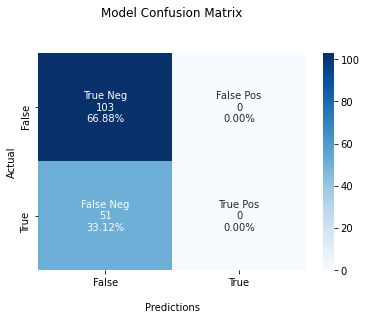

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy:0.6465891062929666


C:\Users\14122\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
dummy_model = DummyClassifier(strategy="most_frequent")

dummy_model.fit(X_train, y_train)

y_predict = dummy_model.predict(X_test)

confusion_matrix_show(confusion_matrix(y_test, y_predict))

y_train_pred = cross_val_predict(dummy_model, X_train, y_train, cv=10)

accuracy = np.mean(cross_val_score(dummy_model, X_train, y_train, scoring='accuracy', cv=10))

f1 = np.mean(cross_val_score(dummy_model, X_train, y_train, scoring='f1', cv=10))

precision = precision_score(y_train, y_train_pred)

recall = recall_score(y_train, y_train_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy:{accuracy}")

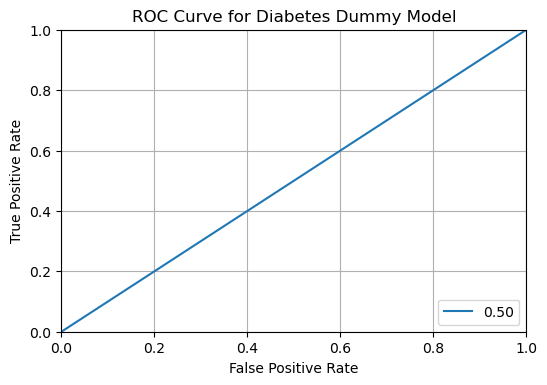

In [101]:
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_predict))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Diabetes Dummy Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [219]:
def roc_show(y_test,y_predict):
    plt.figure(dpi=100)
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_predict))
    plt.plot([0, 1], [0, 1], color='crimson', linestyle='--')
    plt.legend(loc = 'lower right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve for Diabetes for Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

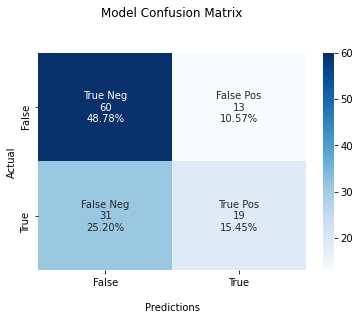

,ROC_AUC,Recall,Precision,F1
0,0.600959,0.38,0.59375,0.463415


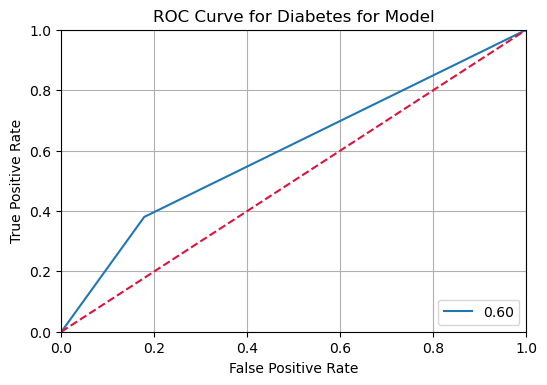

In [220]:
# the most basic knn model

recall_1=[]
precision_1=[]
roc_1=[]
f1_1=[]

knn = KNeighborsClassifier()

knn.fit(X_train2,y_train2)

y_pred = knn.predict(X_test2)

recall_1.append(recall_score(y_test2, y_pred)) 

precision_1.append(precision_score(y_test2, y_pred)) 

roc_1.append(sklearn.metrics.roc_auc_score(y_test2,y_pred))

f1_1.append(fbeta_score(y_test2, y_pred, beta=1))



d_1 = {'ROC_AUC': roc_1, 'Recall': recall_1,'Precision':precision_1,'F1':f1_1}

dfd1 = pd.DataFrame(data=d_1)

confusion_matrix_show(confusion_matrix(y_test2, y_pred))
roc_show(y_test2,y_pred)

dfd1

Let's see how we can improve upon our model. Let's start with finding the best k

In [115]:
table = {}
index = []
AUC =[]
recall=[]
precision=[]
fbeta=[]

for  i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train2,y_train2)
    
    y_pred = knn.predict(X_test2)
    
    index.append(i)
    
    AUC.append(sklearn.metrics.roc_auc_score(y_test2,y_pred))
    
    recall.append(recall_score(y_test2, y_pred))
    
    precision.append(precision_score(y_test2, y_pred))
    
    fbeta.append(fbeta_score(y_test2, y_pred, beta=1))
    
    table.update({'K':index})
    table.update({'ROC_AUC':AUC})
    table.update({'Recall': recall})
    table.update({'Precision': precision})
    table.update({'F-Beta': fbeta})
    
df = pd.DataFrame(table)
df.sort_values('ROC_AUC',ascending=False,inplace=True,ignore_index=True)
df.head(10)

,K,ROC_AUC,Recall,Precision,F-Beta
0,95,0.669452,0.38,0.863636,0.527778
1,97,0.659452,0.36,0.857143,0.507042
2,96,0.656301,0.34,0.894737,0.492754
3,43,0.655753,0.38,0.791667,0.513514
4,3,0.650959,0.48,0.648649,0.551724
5,99,0.649452,0.34,0.850000,0.485714
6,89,0.649452,0.34,0.850000,0.485714
7,98,0.649452,0.34,0.850000,0.485714
8,63,0.642603,0.34,0.809524,0.478873
9,65,0.642603,0.34,0.809524,0.478873


In [9]:
# as you can see roc acc is at most 0.65 without cross val(not very high)
#now lets try cross val"

In [124]:
recall = []
ind=[]
roc=[]
f1=[]

for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_stand,y_train_stand,cv=10,scoring='recall')
    score2=cross_val_score(knn,X_train_stand,y_train_stand,cv=10,scoring='roc_auc')
    score3=cross_val_score(knn,X_train_stand,y_train_stand,cv=10,scoring='f1')
    recall.append(score.mean())
    roc.append(score2.mean())
    f1.append(score3.mean())
    ind.append(i)
d = {'K': ind, 'Recall': k,'ROC_AUC': roc,'F1':f1}
dfd = pd.DataFrame(data=d)
dfd.sort_values('Recall',ascending=False,inplace=True,ignore_index=True)
dfd.head(10)

,K,Recall,ROC_AUC,F1
0,7,0.570996,0.775141,0.607985
1,9,0.561688,0.790134,0.598629
2,3,0.558009,0.733410,0.564841
3,1,0.548918,0.647247,0.542004
4,11,0.543290,0.796380,0.588827
5,25,0.529654,0.820126,0.607001
6,5,0.529437,0.758941,0.567925
7,15,0.529221,0.815066,0.592980
8,13,0.524892,0.800526,0.585446
9,21,0.524459,0.816729,0.592136


For the purpose of our model, the current best k for knn is 7, to get the highest possible Recall.

In [172]:
# trying feature selection so we can improve our score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test,i):
    
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=i)
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
        
    return X_train_fs, X_test_fs, fs

In [173]:
def find_best_score(arr,r):
    maxn=-100
    maxI=0
    for i in range(r):
        if(maxn<arr[i]):
            maxn=arr[i]
            maxI=i+1
    return maxn

In [174]:
def find_best(arr,r):
    maxn=-100
    maxI=0
    for i in range(r):
        if(maxn<arr[i]):
            maxn=arr[i]
            maxI=i+1
    return maxI

In [175]:
modelIk=[]
modelIk.append(0)
modelIndex=range(0,14)
for i in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train_stand, y_train, X_test,i)
    modelI=[]
    
    for j in range(1,100):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train_fs,y_train)

        model_improved = np.mean(cross_val_score(knn, X_train_fs, y_train, scoring='recall', cv=10))
        modelI.append(model_improved)
        #np.seterr(invalid='ignore')
    modelIk.append(find_best_score(modelI,99))

print("done")

done


In [59]:
# as we can see bellow the best k is 8

In [176]:
dfmake = {'K': modelIndex, 'Recall': modelIk}
dfsmall = pd.DataFrame(data=dfmake)
dfsmall.sort_values('Recall',ascending=False,inplace=True,ignore_index=True)
#dfsmall['score'].sort_values(ascending=False)
dfsmall.head(10)

,K,Recall
0,8,0.654762
1,7,0.644372
2,10,0.640260
3,9,0.635498
4,11,0.616883
5,13,0.593939
6,5,0.589610
7,6,0.589610
8,4,0.580952
9,12,0.580087


We get the best Recall score at 8 features. But we may need a different 'k' hyperparameter for knn, so let's see which is the most optimized for this selection of features:

In [177]:
X_train_fs, X_test_fs, fs = select_features(X_train_stand, y_train_stand, X_test_stand,8)

k2 = []
ind=[]
ind=range(1,100)

for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train_fs,y_train_stand,cv=10,scoring='recall')
    k2.append(score.mean())
d2 = {'K': ind, 'Recall': k2}
dfd2 = pd.DataFrame(data=d2)
dfd2.sort_values('Recall',ascending=False,inplace=True,ignore_index=True)
dfd2.head(10)


,K,Recall
0,9,0.654762
1,11,0.654545
2,13,0.645238
3,7,0.645022
4,5,0.636364
5,25,0.631169
6,15,0.626407
7,27,0.622078
8,23,0.622078
9,29,0.617749


- feature selection
- best k
- threshold

- confusion matrix: 

y_train_pred = cross_val_predict(model, X_train, y_train, cv=kf)

#cross validation that returns only predictions made on each test fold

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

cf_matrix_show(confusion_matrix(y_test, y_train_pred)) 


PRECISION: accuracy of the positive predictions (higher score - most positive predictions are true positives)
for us, a high precision means that most of the time when someone is said to have diabetes, they really have diabetes
that means that we are lowering the chance that someone would be falsely labeled as diabetic when they're not.

RECALL (sensitivity/true positive rate): ratio of positive instances that are correctly detected by the classifier.
for us, a high recall means that if someone is diabetic, most chances they will be labeled as diabetic in our model. To place the importance here is to place the importance on diabetic people being detected by our model; but this also means some people may be falsely labeled as diabetic.

DECISION THRESHOLD: raising the threshold = increase precision (less false positives; less people without diabetes being told that they have diabetes) 
lowering the threshold = increase recall (more diabetic people being labeled as diabetic)

predict_probability = cross_val_predict(model, X_tr_copy, y_train, cv=kf, method='predict_proba')

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[:-1], "b--", label="Precision"
    
    plt.plot(thresholds, recalls[:-1], label="recall"
    
    # highlight the threshold, add the legend, axis label, grid
    
 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()


ROC: similar to precision/recall curve, plots true positive rate (recall) versus false positive rate (sensitivity versus specificity) 

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0,1], [0,1], 'k--')
    
    [] # add axis labels and grid
    
plot_roc_curve(fpr,tpr)

plt.show()

In [180]:
X_train2_fs, X_test2_fs, y_train2, y_test2 = train_test_split(X_train_fs,y_train_stand, test_size=0.2, random_state=25)



In [230]:
# next we need to find the right threshold for our purpose

knn_v2 = KNeighborsClassifier(n_neighbors=9)

knn_v2.fit(X_train_fs,y_train_stand)

y_scores = knn_v2.predict(X_test2_fs)

fpr, tpr, thresholds = roc_curve(y_test2, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test2, y_scores))

gmeans = (tpr * (1-fpr))**0.5
ix = np.argmax(gmeans)

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Threshold value is: {optimal_threshold} with score of {gmeans[ix]}" )

[0.  0.7 1. ]
[0.         0.17808219 1.        ]
[2 1 0]
0.760958904109589
Threshold value is: 1 with score of 0.7585133260223084


In [216]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(y_test2,y_scores)

print(threshold)

[1]


In [235]:
y_scores = knn_v2.predict_proba(X_test2_fs)
fpr, tpr, threshold = roc_curve(y_test2, y_scores[:, 1])

Seems like 1 is that threshold.

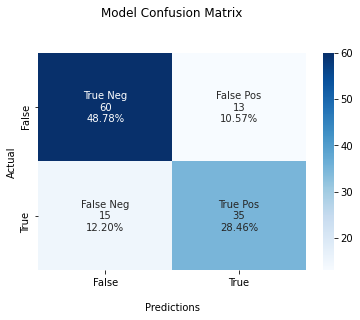

,ROC_AUC,Recall,Precision,F1
0,0.760959,0.7,0.729167,0.714286


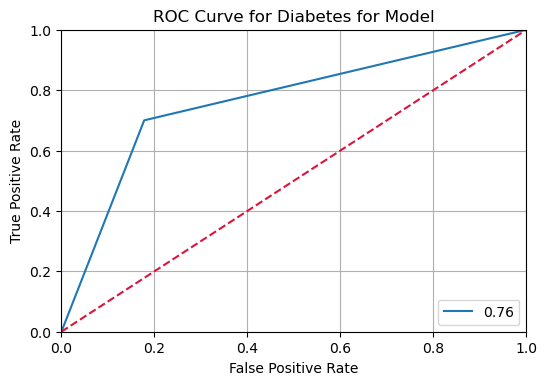

In [240]:
# testing the optimized model:

recall_opt=[]
precision_opt=[]
roc_opt=[]
f1_opt=[]

knn_opt = KNeighborsClassifier(n_neighbors=9)

knn_opt.fit(X_train_fs,y_train_stand)

y_pred_opt = knn_opt.predict(X_test2_fs)

recall_opt.append(recall_score(y_test2, y_pred_opt)) 

precision_opt.append(precision_score(y_test2, y_pred_opt)) 

roc_opt.append(sklearn.metrics.roc_auc_score(y_test2,y_pred_opt))

f1_opt.append(fbeta_score(y_test2, y_pred_opt, beta=1))

d_opt = {'ROC_AUC': roc_opt, 'Recall': recall_opt,'Precision':precision_opt,'F1':f1_opt}

df_opt = pd.DataFrame(data=d_opt)

confusion_matrix_show(confusion_matrix(y_test2, y_pred_opt))
roc_show(y_test2,y_pred_opt)

df_opt

# Random Forest Classifier